# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
# Import the numpy and pandas package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read the given CSV file, and view some sample records
df = pd.read_csv("clean_metabric.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1517 non-null   int64  
 1   age_at_diagnosis                1517 non-null   float64
 2   type_of_breast_surgery          1517 non-null   object 
 3   cancer_type                     1517 non-null   object 
 4   cancer_type_detailed            1517 non-null   object 
 5   cellularity                     1517 non-null   object 
 6   chemotherapy                    1517 non-null   int64  
 7   pam50_claudin_low_subtype       1517 non-null   object 
 8   cohort                          1517 non-null   float64
 9   estrogen_status                 1517 non-null   object 
 10  neoplasm_histologic_grade       1517 non-null   float64
 11  her2_status                     1517 non-null   object 
 12  tumor_other_histologic_subtype  15

In [3]:
df.head()

,Unnamed: 0,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_claudin_low_subtype,cohort,estrogen_status,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,progesterone_status,radio_therapy,3-gene_classifier_subtype,tumor_size,death_from_cancer,overall_survival_years
0,1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positive,...,4.02,IDC,84.63,1,Positive,1,ER+/HER2- High Prolif,10.0,Living,7
1,4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positive,...,6.08,MDLC,41.37,0,Positive,1,ER+/HER2- High Prolif,40.0,Died of Disease,3
2,5,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positive,...,4.06,IDC,7.80,0,Positive,1,ER+/HER2- High Prolif,31.0,Died of Disease,1
3,8,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positive,...,5.03,IDC,36.57,0,Negative,1,ER+/HER2- High Prolif,16.0,Died of Other Causes,3
4,9,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Positive,...,3.06,ILC,36.27,0,Negative,0,ER+/HER2- High Prolif,28.0,Died of Disease,3


In [4]:
df.describe()

,Unnamed: 0,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,overall_survival_years
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,992.448912,61.070778,0.205010,2.698748,2.417930,0.620962,1.998682,5.666447,4.119868,124.594931,0.430455,0.593276,26.356717,10.390244
std,546.450100,12.985959,0.403842,1.221328,0.647215,0.485307,3.941525,3.695824,1.064267,75.140691,0.495303,0.491384,15.322138,6.279599
min,1.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.100000,0.000000,0.000000,1.000000,0.000000
25%,520.000000,51.420000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,3.050000,60.670000,0.000000,0.000000,17.000000,5.000000
50%,1033.000000,61.720000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.050000,115.630000,0.000000,1.000000,23.000000,10.000000
75%,1463.000000,70.610000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040000,185.000000,1.000000,1.000000,30.000000,15.000000
max,1903.000000,96.290000,1.000000,5.000000,3.000000,1.000000,41.000000,46.000000,6.360000,337.030000,1.000000,1.000000,182.000000,28.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

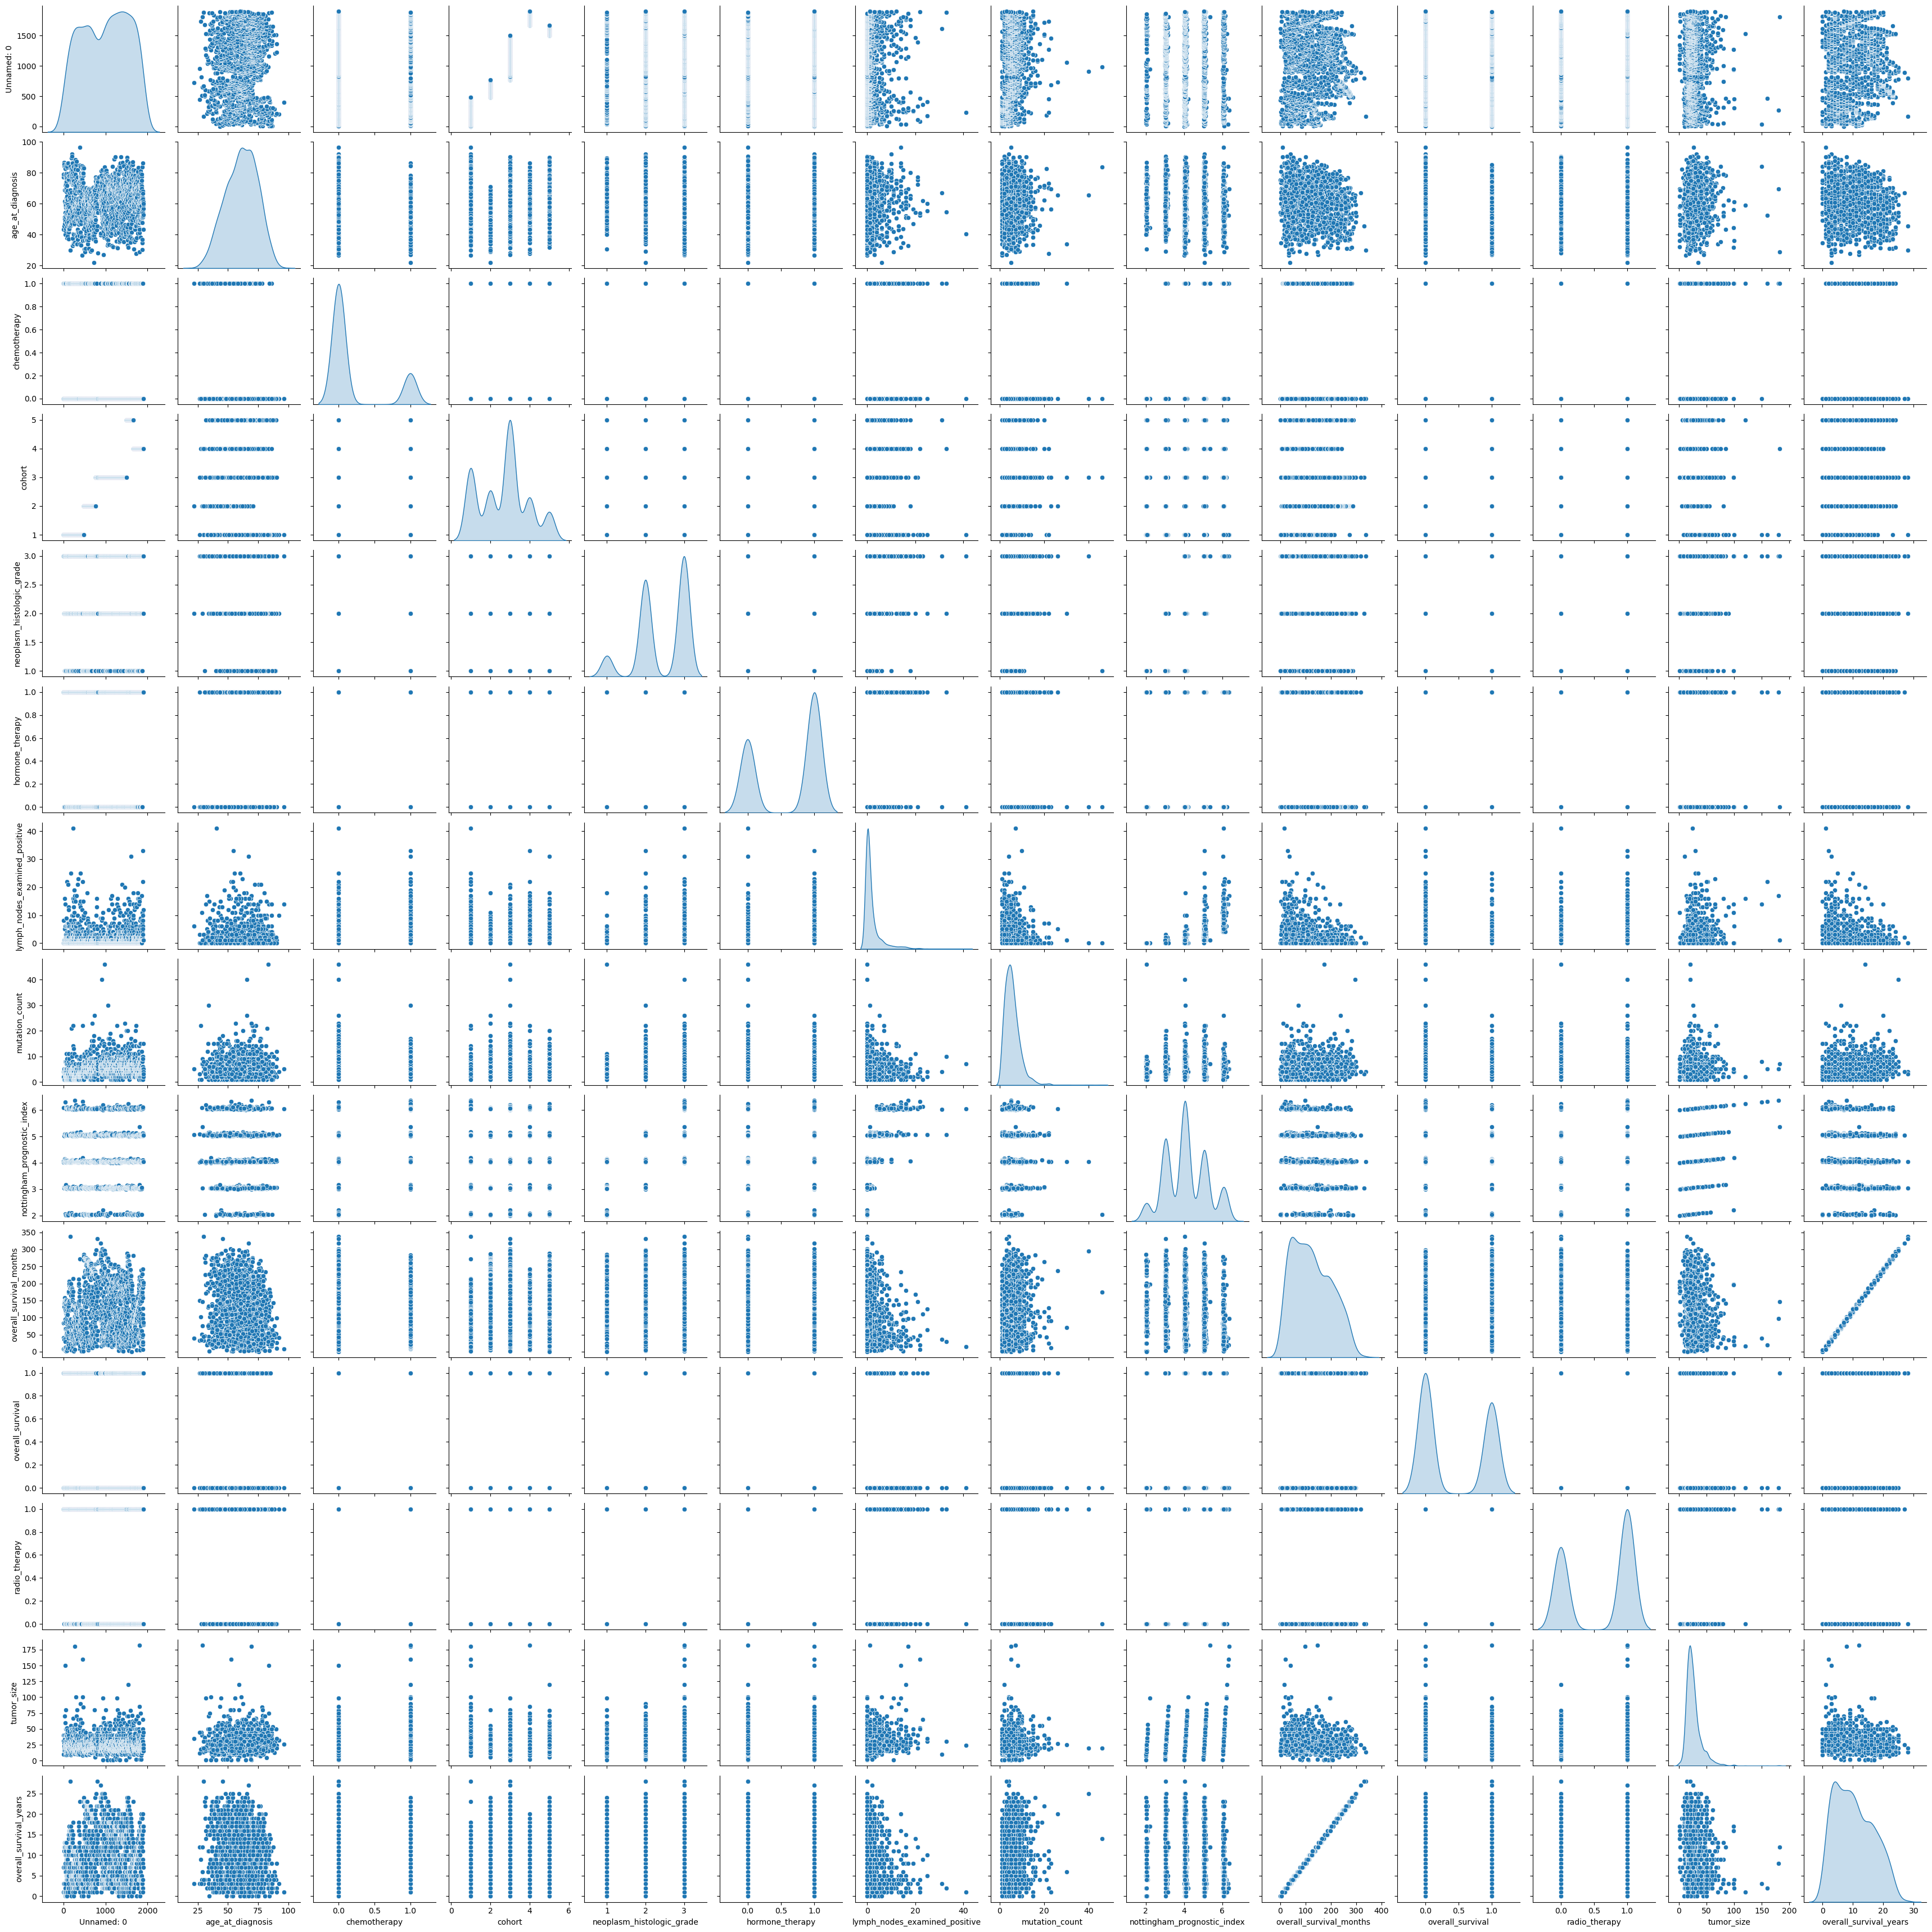

In [5]:
sns.pairplot(data=df, diag_kind='kde')

In [6]:
# Tumor size and lymph nodes are skewed, and age and overall survival months have a normal distribution. 

In [7]:
# Age at diagnosis and lymph nodes examined seem to have a negative correlation with survival months

In [8]:
# Will add the variables that seem to have higher correlation 
df_Cor = df[['age_at_diagnosis', 'neoplasm_histologic_grade','radio_therapy', 'nottingham_prognostic_index','mutation_count',
                               'lymph_nodes_examined_positive', 'hormone_therapy','chemotherapy',
                               'overall_survival', 'overall_survival_months', 'tumor_size', 'overall_survival_years']].copy()

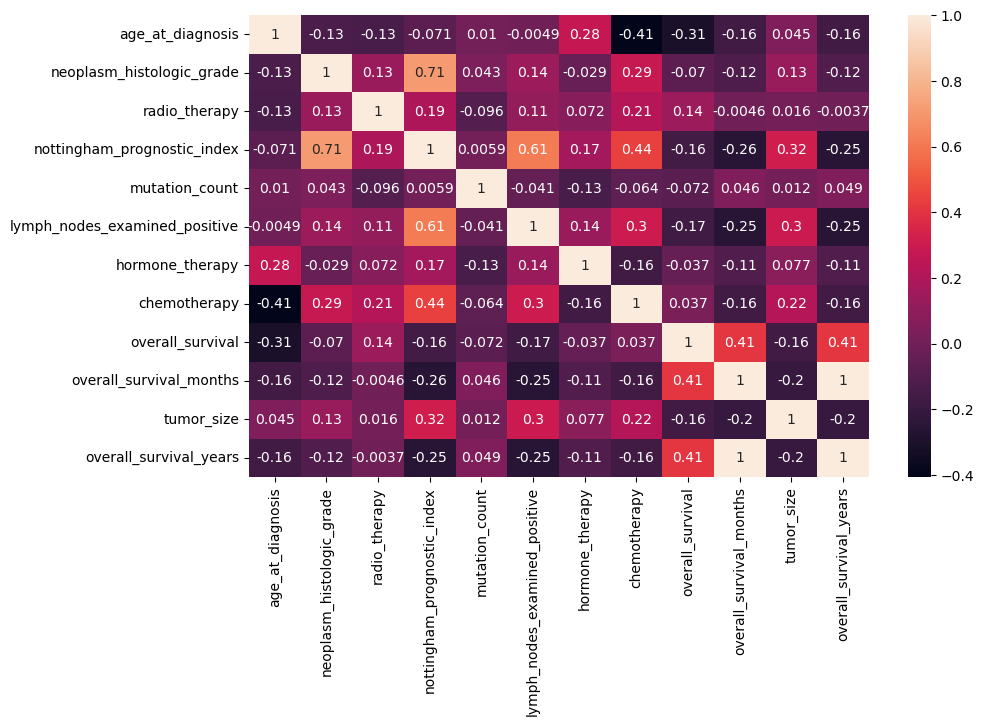

In [9]:
# Checking the heat map
corr = df_Cor.corr()
sns.heatmap(corr, annot=True).figure.set_size_inches(10, 6)
plt.show()

In [10]:
# Checking Top 10 values, correlating with overall survival
Corr = df.corr()['overall_survival'].sort_values(ascending = False)
df_corr = pd.DataFrame({'Correlation':Corr})
df_corr.head(10)

C:\Users\snigd\AppData\Local\Temp\ipykernel_33604\1310792573.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr = df.corr()['overall_survival'].sort_values(ascending = False)


,Correlation
overall_survival,1.000000
overall_survival_months,0.409605
overall_survival_years,0.408501
radio_therapy,0.139823
chemotherapy,0.036699
hormone_therapy,-0.037015
neoplasm_histologic_grade,-0.069773
mutation_count,-0.071777
Unnamed: 0,-0.108226
cohort,-0.131159


In [11]:
#checking for negatively correlating values with overall survival
df_corr.tail(10)

,Correlation
chemotherapy,0.036699
hormone_therapy,-0.037015
neoplasm_histologic_grade,-0.069773
mutation_count,-0.071777
Unnamed: 0,-0.108226
cohort,-0.131159
nottingham_prognostic_index,-0.156036
tumor_size,-0.161274
lymph_nodes_examined_positive,-0.169326
age_at_diagnosis,-0.310132


## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

Will test with multiple variables initially and then 2 correlating variables
References: https://medium.com/analytics-vidhya/linear-regression-using-pandas-numpy-for-beginners-in-data-science-fe57157ed93d

In [12]:
# Testing multiple variables 
from sklearn.model_selection import train_test_split
#Feature Selection 
y=df.overall_survival.values
X=df[['age_at_diagnosis', 'radio_therapy', 'neoplasm_histologic_grade', 'nottingham_prognostic_index',
                               'lymph_nodes_examined_positive', 
                                 'tumor_size']]
#Split data into test and train
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
# As there are lot of outliers in my data, I will standardize the values
#Scaling numeric features using sklearn StandardScalar
from sklearn.preprocessing import StandardScaler
     
numeric=['age_at_diagnosis', 'neoplasm_histologic_grade', 'nottingham_prognostic_index',
                               'lymph_nodes_examined_positive', 
                                 'tumor_size']
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

In [14]:
X_test.head()

,age_at_diagnosis,radio_therapy,neoplasm_histologic_grade,nottingham_prognostic_index,lymph_nodes_examined_positive,tumor_size
724,1.532863,1,-0.641496,-1.007730,-0.495800,-0.403230
812,0.805584,0,-0.641496,-0.057987,-0.234206,-0.339046
1466,-0.082543,1,-2.179311,-1.026725,-0.234206,-0.884606
1469,0.886393,0,-0.641496,-1.017228,-0.495800,-0.595780
51,1.709103,1,-2.179311,-0.998233,-0.234206,-0.018129


In [15]:
X_train.head()

,age_at_diagnosis,radio_therapy,neoplasm_histologic_grade,nottingham_prognostic_index,lymph_nodes_examined_positive,tumor_size
999,-1.061483,0,0.896319,-0.095977,-0.495800,-1.558533
1465,-0.251856,1,-2.179311,-1.017228,0.027389,-0.878188
1281,-1.527865,1,0.896319,1.907982,1.596956,1.843192
664,-0.204141,0,-2.179311,-1.947977,-0.495800,-0.082313
602,-1.391645,1,0.896319,1.841500,2.904929,-0.403230


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate your model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))


(0.16494417931605587, 0.41006421341031435, 0.4485140099113111)

In [17]:
import statsmodels.api as sm

#adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fitting the regression line using 'OLS' regression function - model now lives in the variable 'lr'
lr = sm.OLS(y_train, X_train_sm).fit()

#printing the parameters
lr.params

const                            0.354451
age_at_diagnosis                -0.148141
radio_therapy                    0.140718
neoplasm_histologic_grade       -0.025099
nottingham_prognostic_index     -0.044662
lymph_nodes_examined_positive   -0.041903
tumor_size                      -0.041796
dtype: float64

In [18]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     37.30
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.20e-41
Time:                        23:29:17   Log-Likelihood:                -767.42
No. Observations:                1213   AIC:                             1549.
Df Residuals:                    1206   BIC:                             1585.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3545      0.021     17.114      0.000       0.314       0.395
age_at_diagnosis                 -0.1481      0.013    -11.105      0.000      -0.174      -0.122
radio_therapy                     0.1407      0.027      5.146      0.000       0.087       0.194
neoplasm_histologic_grade        -0.0251      0.022     -1.130      0.259      -0.069       0.018
nottingham_prognostic_index      -0.0447      0.028     -1.588      0.112      -0.100       0.011
lymph_nodes_examined_positive    -0.0419      0.020     -2.143      0.032      -0.080      -0.004
tumor_size                       -0.0418      0.014     -2.970      0.003      -0.069      -0.014
==============================================================================
Omnibus:                    23465.184   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.332
Skew:                           0.146   Prob(JB):                     1.63e-22
Kurtosis:                       1.622   Cond. No.                         4.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

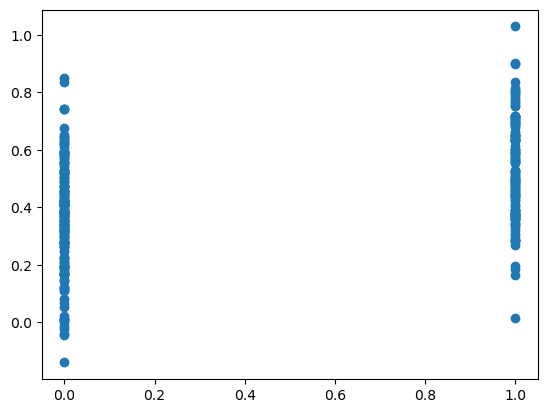

In [19]:
plt.scatter(y_test,ypred)

In [20]:
#Mean absolute error (MAE) and root-mean-square error (RMSE) are the metrics used to evaluate regression models. 
from sklearn import metrics
print('MAE=', metrics.mean_absolute_error(y_test,ypred) )
print('MSE=', metrics.mean_squared_error(y_test,ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

MAE= 0.41006421341031435
MSE= 0.20116481708672362
RMSE: 0.4485140099113111


### Error Terms

C:\Users\snigd\AppData\Local\Temp\ipykernel_33604\1062052098.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


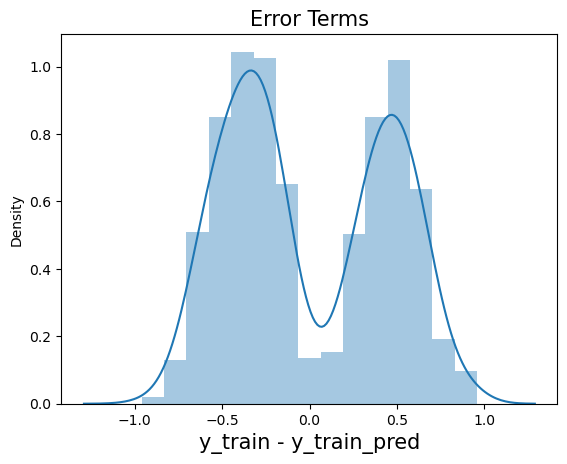

In [21]:
#Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

#plot data
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

##Linear Regression Model with 2 variables 

In [22]:
# Will check the correlation for 'age at diagnosis' and 'overall survival'


In [23]:
X=df['age_at_diagnosis']
y=df['overall_survival']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                            test_size = 0.3, random_state = 100)

In [25]:
X_test.head()

1298    80.93
1409    83.39
249     48.93
1342    68.74
1503    54.42
Name: age_at_diagnosis, dtype: float64

In [26]:
y_test.head()

1298    0
1409    0
249     1
1342    1
1503    0
Name: overall_survival, dtype: int64

In [27]:
y_train.head()

1401    0
306     1
355     1
474     0
963     1
Name: overall_survival, dtype: int64

In [28]:
import statsmodels.api as sm

#adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fitting the regression line using 'OLS' regression function - model now lives in the variable 'lr'
lr = sm.OLS(y_train, X_train_sm).fit()

#printing the parameters
lr.params

const               1.079700
age_at_diagnosis   -0.010621
dtype: float64

In [29]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     90.16
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.41e-20
Time:                        23:31:19   Log-Likelihood:                -717.27
No. Observations:                1061   AIC:                             1439.
Df Residuals:                    1059   BIC:                             1448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0797      0.070     15.513      0.000       0.943       1.216
age_at_diagnosis    -0.0106      0.001     -9.495      0.000      -0.013      -0.008
==============================================================================
Omnibus:                     5544.714   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.732
Skew:                           0.198   Prob(JB):                     4.98e-28
Kurtosis:                       1.361   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

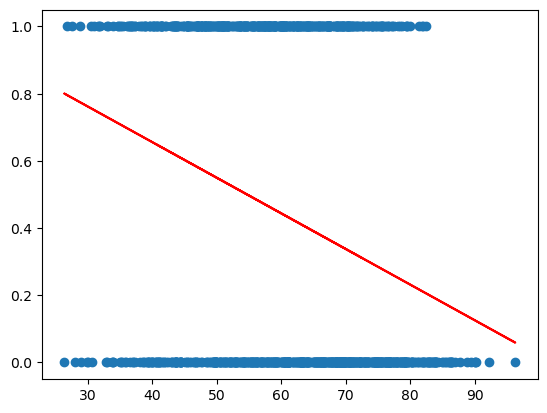

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.0797 -0.0106*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

C:\Users\snigd\AppData\Local\Temp\ipykernel_33604\1062052098.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


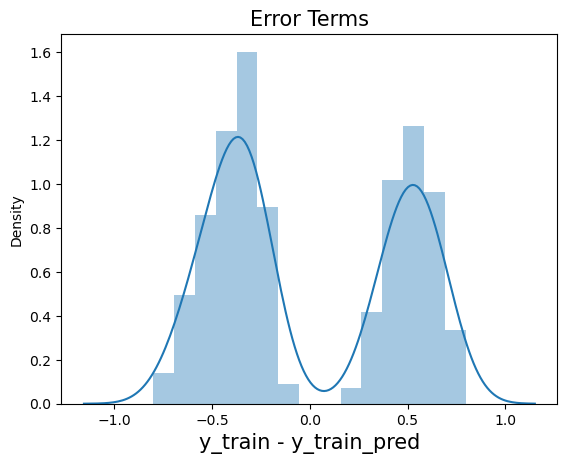

In [31]:
#Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

#plot data
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? R-squared with multiple variables is 0.157 and 2 variables(Age and overll survival) is 0.078

2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 
As The R-squared value is less than 0.8, the linear regression test may not be the best choice for a predictive analysis.
The data also has a lot of outliers and skewing with possible multicollinearity, and we may need to additionally process 
the data (scale and transform) to get an accurate model prediction.

3. Was your plot of the error terms a bell curve? Yes